In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms

from LearningRateFinder import LR_Finder

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform = transform)
#trainloader = torch.utils.data.DataLoader (train_dataset, batch_size = 1024, shuffle = True)
trainloader = torch.utils.data.DataLoader (train_dataset, batch_size = 64, shuffle = True)

test_dataset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform = transform)
#testloader = torch.utils.data.DataLoader (test_dataset, batch_size = 1024, shuffle = True)
testloader = torch.utils.data.DataLoader (test_dataset, batch_size = 64, shuffle = True)

In [3]:
class Classifier (nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256,128)
    self.fc4 = nn.Linear(128, 64)
    self.fc5 = nn.Linear(64, 10)
    self.dropout = nn.Dropout(0.4)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = F.relu(self.fc3(x))
    x = self.dropout(x)
    x = F.relu(self.fc4(x))
    x = F.log_softmax(self.fc5(x), dim = 1)
    
    return x

In [4]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Classifier()
model.apply(init_weights)
criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters())
optimizer = optim.SGD(model.parameters(),lr=0.3)

model.to(device)

/home/ubuntu/.conda/envs/deeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  This is separate from the ipykernel package so we can avoid doing imports until


Classifier(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.4)
)

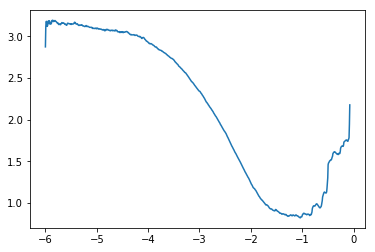

In [6]:
lr_finder = LR_Finder(model, optimizer, criterion, trainloader)
lr_finder.find()
lr_finder.plot_lr()